# **Importacion de Librerias**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# **Lectura de CSV**

In [ ]:
df = pd.read_csv('airline.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


# **Limpieza de Datos**

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


# **Analisis de Datos**

el precio varia por aerolinea?

In [ ]:
pricemean = df.groupby('airline')['price'].mean().reset_index().round().sort_values(by='price', ascending=False)
pricemean


,airline,price
5,Vistara,30397.0
1,Air_India,23507.0
4,SpiceJet,6179.0
2,GO_FIRST,5652.0
3,Indigo,5324.0
0,AirAsia,4091.0


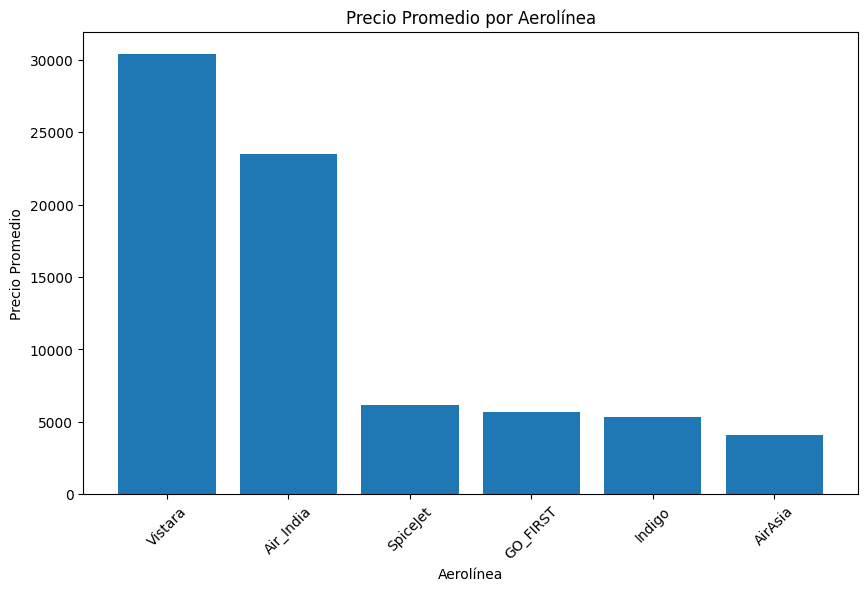

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(pricemean['airline'], pricemean['price'])
plt.xlabel('Aerolínea')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio por Aerolínea')
plt.xticks(rotation=45)
plt.show()

Cómo se ve afectado el precio cuando los billetes se compran sólo 1 o 2 días antes de la salida?

In [ ]:
df_1 = df[df['days_left'] == 1]
df_2 = df[df['days_left'] == 2]

mean_prices_1 = df_1.groupby('departure_time')['price'].mean().reset_index()
mean_prices_2 = df_2.groupby('departure_time')['price'].mean().reset_index()


In [ ]:
mean_prices_1

,departure_time,price
0,Afternoon,14314.309659
1,Early_Morning,14502.246575
2,Evening,27921.819876
3,Late_Night,6270.000000
4,Morning,14866.654589
5,Night,31145.393939


In [ ]:
mean_prices_2

,departure_time,price
0,Afternoon,27786.207071
1,Early_Morning,28681.747977
2,Evening,33191.193732
3,Morning,29752.680639
4,Night,30377.853516


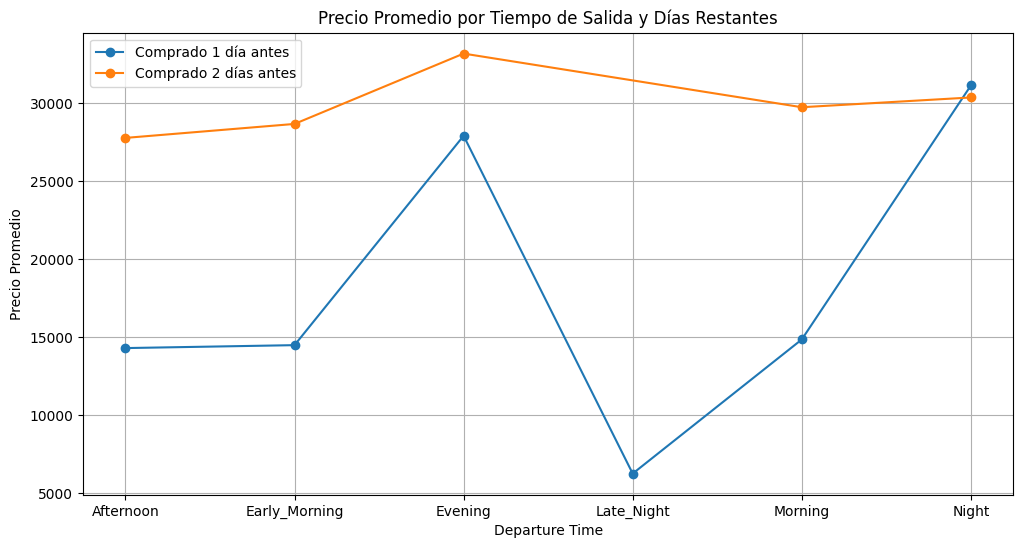

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(mean_prices_1['departure_time'], mean_prices_1['price'], marker='o', label='Comprado 1 día antes')
plt.plot(mean_prices_2['departure_time'], mean_prices_2['price'], marker='o', label='Comprado 2 días antes')

plt.xlabel('Departure Time')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio por Tiempo de Salida y Días Restantes')
plt.legend()
plt.grid(True)
plt.show()

el precio del billete cambia según la hora de salida y la hora de llegada?

In [ ]:
mean_prices_departure = df.groupby('departure_time')['price'].mean().reset_index()
mean_prices_arrival = df.groupby('arrival_time')['price'].mean().reset_index()

In [ ]:
mean_prices_departure

,departure_time,price
0,Afternoon,18179.203331
1,Early_Morning,20370.676718
2,Evening,21232.361894
3,Late_Night,9295.299387
4,Morning,21630.760254
5,Night,23062.146808


In [ ]:
mean_prices_arrival

,arrival_time,price
0,Afternoon,18494.598993
1,Early_Morning,14993.139521
2,Evening,23044.371615
3,Late_Night,11284.906078
4,Morning,22231.076098
5,Night,21586.758341


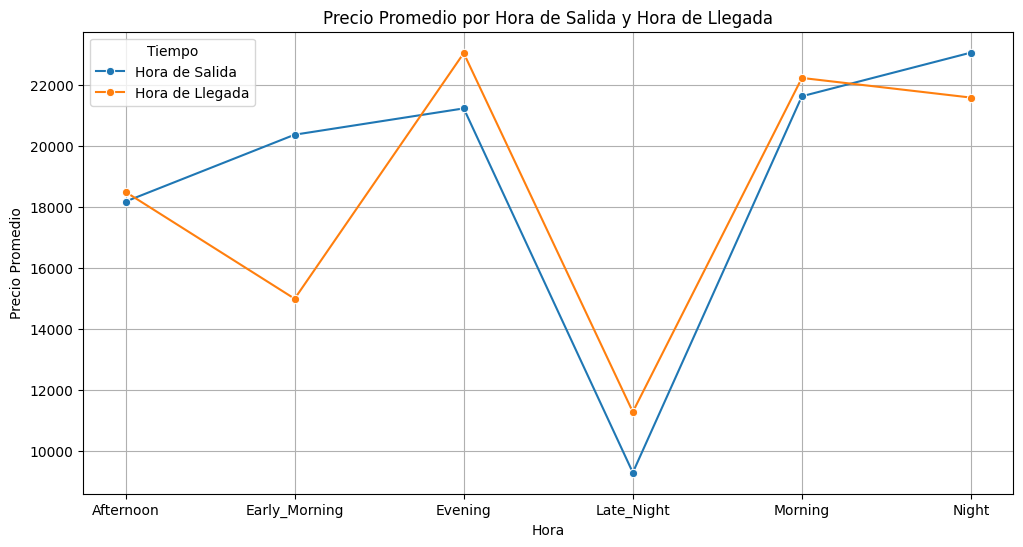

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='departure_time', y='price', data=mean_prices_departure, marker='o', label='Hora de Salida')
sns.lineplot(x='arrival_time', y='price', data=mean_prices_arrival, marker='o', label='Hora de Llegada')

plt.xlabel('Hora')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio por Hora de Salida y Hora de Llegada')
plt.legend(title='Tiempo')
plt.grid(True)
plt.show()

como cambia el precio con el cambio en origen y destino?

In [ ]:
mean_prices_source = df.groupby('source_city')['price'].mean().reset_index()
mean_prices_destination = df.groupby('destination_city')['price'].mean().reset_index()

In [ ]:
mean_prices_source

,source_city,price
0,Bangalore,21469.460575
1,Chennai,21995.339871
2,Delhi,18951.326639
3,Hyderabad,20155.623879
4,Kolkata,21746.235679
5,Mumbai,21483.818839


In [ ]:
mean_prices_destination

,destination_city,price
0,Bangalore,21593.955784
1,Chennai,21953.323969
2,Delhi,18436.767870
3,Hyderabad,20427.661284
4,Kolkata,21959.557556
5,Mumbai,21372.529469


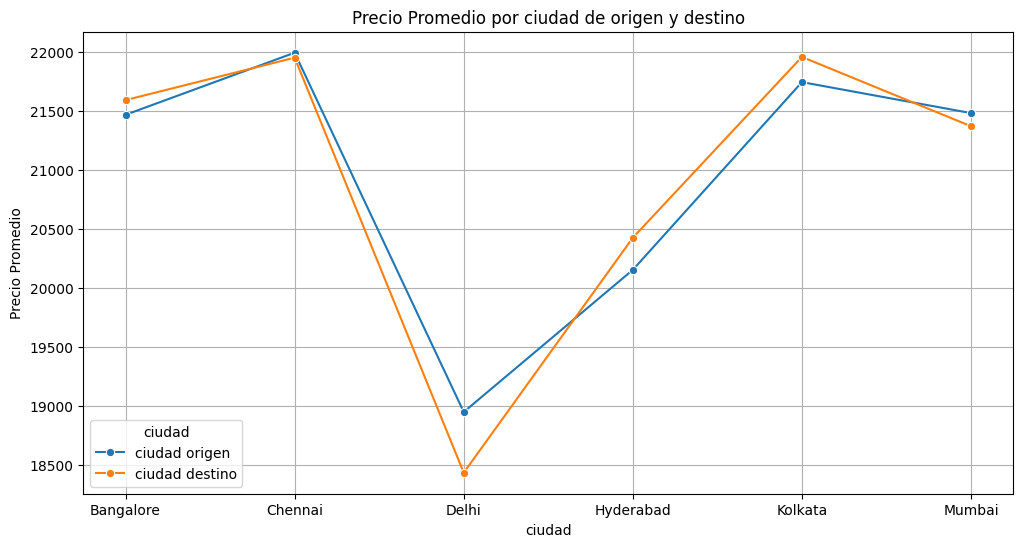

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='source_city', y='price', data=mean_prices_source, marker='o', label='ciudad origen')
sns.lineplot(x='destination_city', y='price', data=mean_prices_destination, marker='o', label='ciudad destino')

plt.xlabel('ciudad')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio por ciudad de origen y destino')
plt.legend(title='ciudad')
plt.grid(True)
plt.show()

como varía el precio del billete entre clase economy y business?

In [ ]:
mean_prices_class = df.groupby('class')['price'].mean().reset_index()
mean_prices_class

,class,price
0,Business,52540.081124
1,Economy,6572.342383


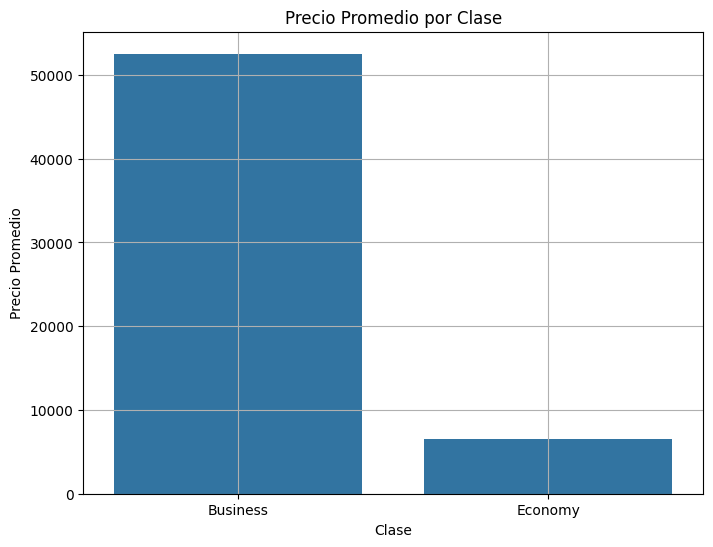

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='price', data=mean_prices_class)

plt.xlabel('Clase')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio por Clase')
plt.grid(True)
plt.show()

# **Modelo Machine Learning para Prediccion de Precios**

codificando varibles numericas

In [ ]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

preparando los datos

In [ ]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

aplicando modelo de regresion lineal

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train1 = lr.predict(X_train)
y_pred_test1 = lr.predict(X_test)

mse_train1 = mean_squared_error(y_train, y_pred_train1)
r2_train1 = r2_score(y_train, y_pred_train1)
mse_test1 = mean_squared_error(y_test, y_pred_test1)
r2_test1 = r2_score(y_test, y_pred_test1)

print("LR  MSE - Train: {:}".format(mse_train1))
print("LR  R2 - Train: {:}".format(r2_train1))
print("LR  MSE - Test: {:}".format(mse_test1))
print("LR  R2 - Test: {:}".format(r2_test1))

LR  MSE - Train: 49170495.59312733
LR  R2 - Train: 0.9045992290556947
LR  MSE - Test: 49070241.26461273
LR  R2 - Test: 0.9046562364171973


aplicando modelo XGBRegressor

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

XGBR = XGBRegressor()
XGBR.fit(X_train_scaled, y_train)

y_pred_train2 = XGBR.predict(X_train_scaled)
y_pred_test2 = XGBR.predict(X_test_scaled)

mse_train2 = mean_squared_error(y_train, y_pred_train2)
mse_test2 = mean_squared_error(y_test, y_pred_test2)
r2_train2 = r2_score(y_train, y_pred_train2)
r2_test2 = r2_score(y_test, y_pred_test2)

print("XGBR  MSE - Train: {:.2f}".format(mse_train2))
print("XGBR  R^2 - Train: {:.2f}".format(r2_train2))
print("XGBR  MSE - Test: {:.2f}".format(mse_test2))
print("XGBR  R^2 - Test: {:.2f}".format(r2_test2))

XGBR  MSE - Train: 8379366.22
XGBR  R^2 - Train: 0.98
XGBR  MSE - Test: 11680761.60
XGBR  R^2 - Test: 0.98


aplicando modelo KNeighborsRegressor

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KNR = KNeighborsRegressor()
KNR.fit(X_train_scaled, y_train)

y_pred_train3 = KNR.predict(X_train_scaled)
y_pred_test3 = KNR.predict(X_test_scaled)

mse_train3 = mean_squared_error(y_train, y_pred_train3)
mse_test3 = mean_squared_error(y_test, y_pred_test3)
r2_train3 = r2_score(y_train, y_pred_train3)
r2_test3 = r2_score(y_test, y_pred_test3)

print("KNR  MSE - Train: {:.2f}".format(mse_train3))
print("KNR  R^2 - Train: {:.2f}".format(r2_train3))
print("KNR  MSE - Test: {:.2f}".format(mse_test3))
print("KNR  R^2 - Test: {:.2f}".format(r2_test3))

KNR  MSE - Train: 8928929.90
KNR  R^2 - Train: 0.98
KNR  MSE - Test: 14588881.93
KNR  R^2 - Test: 0.97


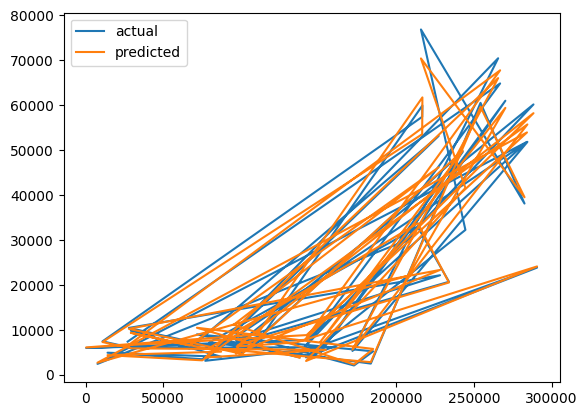

In [ ]:
pred=pd.DataFrame({"y_test":y_test,'y_pred':y_pred_test2})
plt.plot(pred[0:50])
plt.legend(['actual','predicted'])
plt.show()